In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import warnings
warnings.filterwarnings("ignore")

In [95]:
df = sns.load_dataset("titanic")

In [35]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [37]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [96]:
df = df[['survived', 'pclass', 'sex', 'age', 'fare']]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [40]:
df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [41]:
df['sex'] = np.where(df['age']=="male", 1, 0)

In [42]:
df.head()

,survived,pclass,sex,age,fare
0,0,3,0,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,0,35.0,8.0500


In [43]:
df['age'].mean()

29.69911764705882

In [44]:
df['age'].median()

28.0

In [97]:
df['age'].fillna(value=29, inplace=True)

In [46]:
df['age'].isnull().sum()

0

In [47]:
df['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


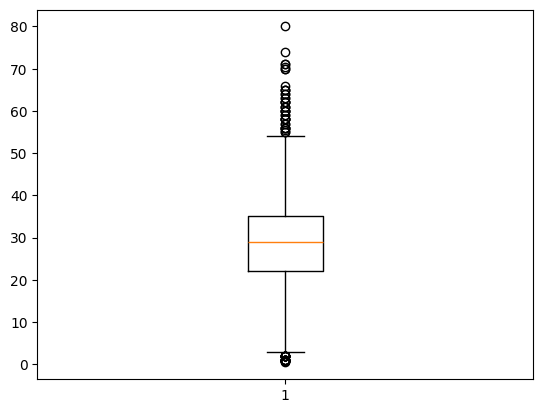

In [98]:
plt.boxplot(df['age'])
plt.show()

In [49]:
def calcu_lf_uf(q1, q3):
    IQR = q3-q1
    lf = q1-(1.5*IQR)
    uf = q3+(1.5*IQR)
    print("lf-->", lf, "uf-->", uf)
    return [lf, uf]
    


In [50]:
df.duplicated().sum()

149

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.duplicated().sum()

0

In [53]:
df.describe()

,survived,pclass,sex,age,fare
count,742.000000,742.000000,742.0,742.000000,742.000000
mean,0.416442,2.223720,0.0,29.745849,34.923001
std,0.493301,0.860642,0.0,13.938015,50.277785
min,0.000000,1.000000,0.0,0.420000,0.000000
25%,0.000000,1.000000,0.0,21.000000,8.050000
50%,0.000000,3.000000,0.0,29.000000,16.100000
75%,1.000000,3.000000,0.0,36.875000,35.375000
max,1.000000,3.000000,0.0,80.000000,512.329200


In [67]:
[lf, uf] = calcu_lf_uf(21.000000,36.875000) 

lf--> -2.8125 uf--> 60.6875


In [68]:
df['age'] = np.where(df['age']>uf, round(uf), df['age'])
df['age'] = np.where(df['age']<lf, round(lf), df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20e654d3610>,
 'caps': [<matplotlib.lines.Line2D at 0x20e654e0990>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e654d2cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20e654e1b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e654e23d0>],
 'means': []}

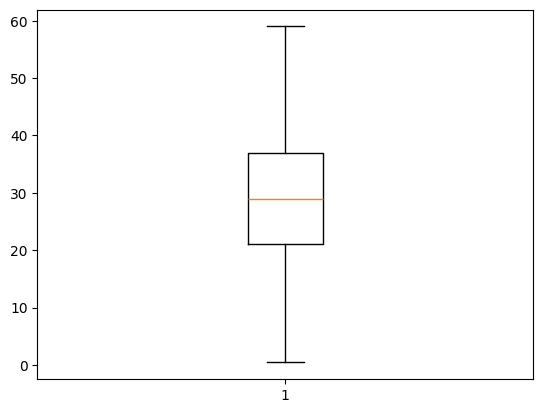

In [69]:
plt.boxplot(df['age'])

In [70]:
[lf, uf] = calcu_lf_uf(8.050000, 35.375000)


lf--> -32.9375 uf--> 76.3625


In [71]:
df['fare'] = np.where(df['fare']>uf, uf, df['fare'])
df['fare'] = np.where(df['fare']<lf, lf, df['fare'])

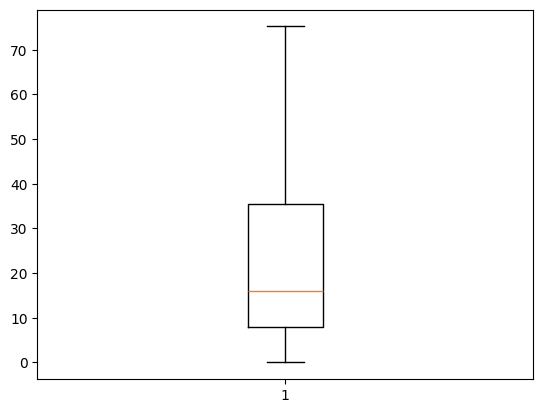

In [72]:
plt.boxplot(df['fare'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20e65237150>,
 'caps': [<matplotlib.lines.Line2D at 0x20e65235410>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e65237990>],
 'medians': [<matplotlib.lines.Line2D at 0x20e651db050>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e65298550>],
 'means': []}

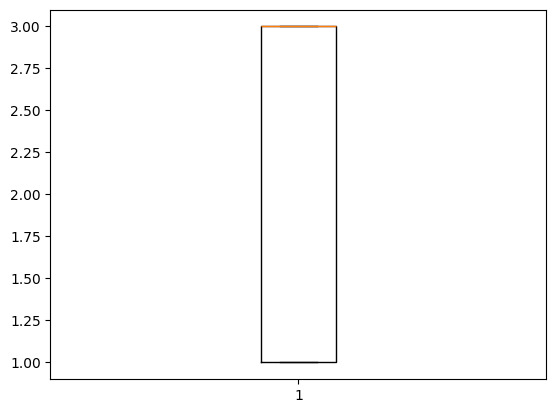

In [73]:
plt.boxplot(df['pclass'])

In [74]:
y = df['survived']
x = df.drop(columns="survived")

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=88)

In [100]:
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [101]:
gb.fit(x_train, y_train)

GaussianNB()

In [102]:
print("Training accuracy:", gb.score(x_train, y_train))
print("Test accuracy:", gb.score(x_test, y_test))


Training accuracy: 0.6762225969645869
Test accuracy: 0.6442953020134228


In [103]:
mb.fit(x_train, y_train)

MultinomialNB()

In [104]:
print("Training accuracy:", mb.score(x_train, y_train))
print("Test accuracy:", mb.score(x_test, y_test))


Training accuracy: 0.6779089376053963
Test accuracy: 0.6577181208053692


In [105]:
bb.fit(x_train, y_train)

BernoulliNB()

In [106]:
print("Training accuracy:", bb.score(x_train, y_train))
print("Test accuracy:", bb.score(x_test, y_test))


Training accuracy: 0.5919055649241147
Test accuracy: 0.5503355704697986


In [107]:
dummy = x_train

In [108]:
dummy

,pclass,sex,age,fare
269,1,0,35.0,75.208875
60,3,0,22.0,7.229200
540,1,0,36.0,71.000000
645,1,0,48.0,75.208875
204,3,0,18.0,8.050000
...,...,...,...,...
681,1,0,27.0,75.208875
724,1,0,27.0,53.100000
408,3,0,21.0,7.775000
501,3,0,21.0,7.750000


In [110]:
dummy['pre_y'] = gb.predict(dummy)

In [111]:
dummy

,pclass,sex,age,fare,pre_y
269,1,0,35.0,75.208875,1
60,3,0,22.0,7.229200,0
540,1,0,36.0,71.000000,1
645,1,0,48.0,75.208875,1
204,3,0,18.0,8.050000,0
...,...,...,...,...,...
681,1,0,27.0,75.208875,1
724,1,0,27.0,53.100000,1
408,3,0,21.0,7.775000,0
501,3,0,21.0,7.750000,0


In [113]:
d = {"pclass":[1], "sex":[1], "age":[54], "fare":[29]}
f = pd.DataFrame(d)
gb.predict(f)

array([1], dtype=int64)

In [114]:
from sklearn import metrics

In [115]:
x_train.drop(columns="pre_y", inplace=True)

In [117]:
print(metrics.classification_report(y_train, gb.predict(x_train)))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75       351
           1       0.64      0.48      0.55       242

    accuracy                           0.68       593
   macro avg       0.67      0.65      0.65       593
weighted avg       0.67      0.68      0.67       593

